In [52]:
import pandas as pd
pd.__version__
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


In [53]:
# Let us now load the dataset
olympics = pd.read_csv('C:/Users/Prajw/Downloads/athlete_events.csv')
regions = pd.read_csv('C:/Users/Prajw/Downloads/noc_regions.csv')

In [54]:
# Joining the dataframes
olympics_df = olympics.merge(regions, how = 'left' , on = 'NOC')
olympics_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [55]:
#Changing column names
olympics_df.rename(columns = {'region':'Region', 'notes':'Notes'}, inplace = True)

In [56]:
olympics_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [57]:
olympics_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [58]:
#Let's check null values
nan_values = olympics_df.isna()
nan_columns = nan_values.any()
nan_columns 

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [59]:
#USA olympics contingent
olympics_df.query('Team == "IND"').head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes


In [69]:
# TOP PARTICIPATING COUNTRIES
top_10_countries = olympics_df.Team.value_counts().sort_values(ascending=False).head(10)
top_10_countries


United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

<AxesSubplot:title={'center':'Participation by Country'}, ylabel='Team'>

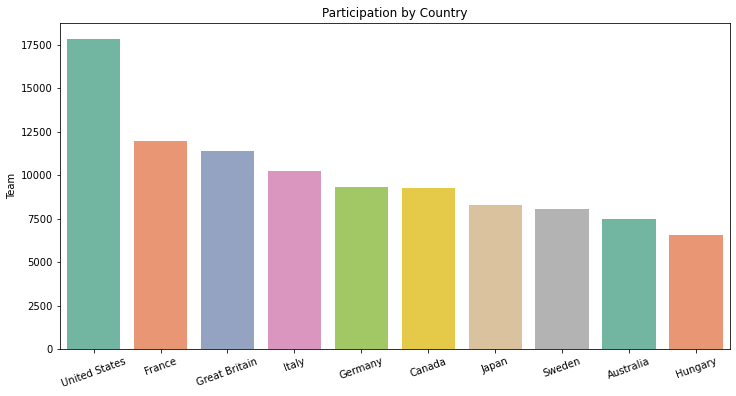

In [70]:
# PLOT FOR TOP 10 Countries
plt.figure(figsize=(12,6))
plt.xticks(rotation=20)
plt.title("Participation by Country")
sns.barplot(x=top_10_countries.index, y=top_10_countries, palette='Set2')

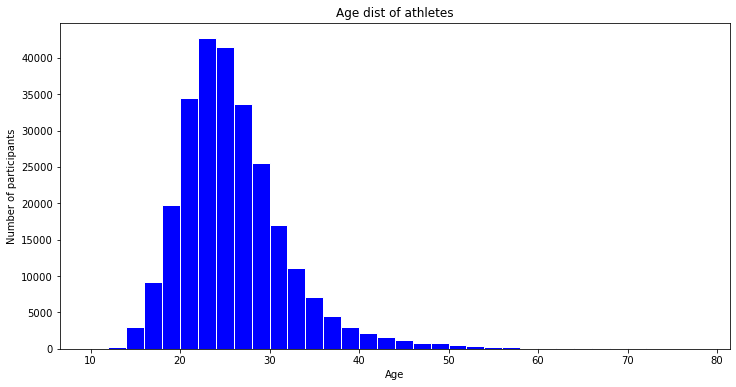

In [74]:
#AGE DISTRIBUTION OF ATHLETES
plt.figure(figsize=(12,6))
plt.title("Age dist of athletes")
plt.xlabel('Age')
plt.ylabel('Number of participants')
plt.hist(olympics_df.Age, bins = np.arange(10,80,2), color = 'blue', edgecolor='white');

In [81]:
# SPORTS HELD DURING SUMMER AND WINTER OLYMPICS

summer_sports = olympics_df[olympics_df.Season=='Summer'].Sport.unique()
summer_sports


array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [82]:
winter_sports = olympics_df[olympics_df.Season=='Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

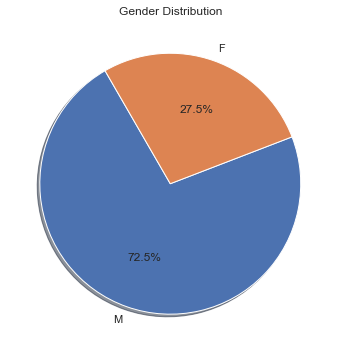

In [118]:
#PLOT FOR MALE AND FEMALE ATHELTES
plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
gender_count = olympics_df.Sex.value_counts()
plt.pie(gender_count, labels = gender_count.index, startangle = 120,autopct = '%1.1f%%', shadow = True);


In [119]:
# TOTAL NUMBER OF FEMALE ATHLETES IN EACH OLYMPICS
olympics_df.Medal.value_counts()

female = olympics_df[(olympics_df.Sex=='F') & (olympics_df.Season=='Summer')][['Sex','Year']]
female = female.groupby('Year').count().reset_index()
female.tail()



,Year,Sex
23,2000,5431
24,2004,5546
25,2008,5816
26,2012,5815
27,2016,6223


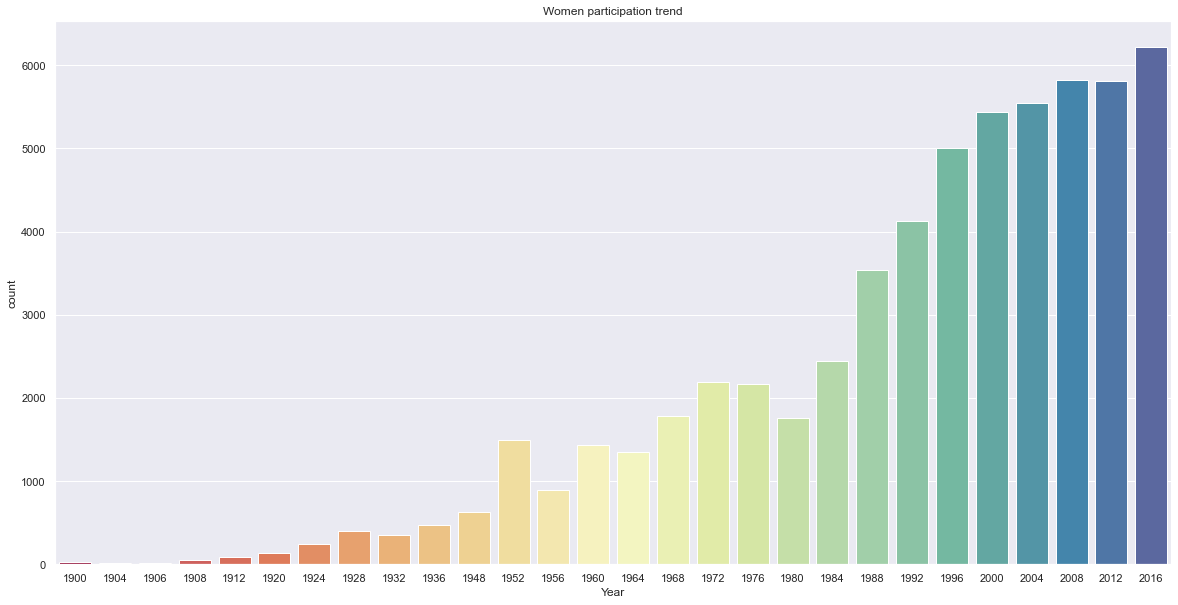

In [120]:
women = olympics_df[(olympics_df.Sex=='F')&(olympics_df.Season=='Summer')]
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
sns.countplot(x='Year',data=women, palette = "Spectral")
plt.title('Women participation trend');

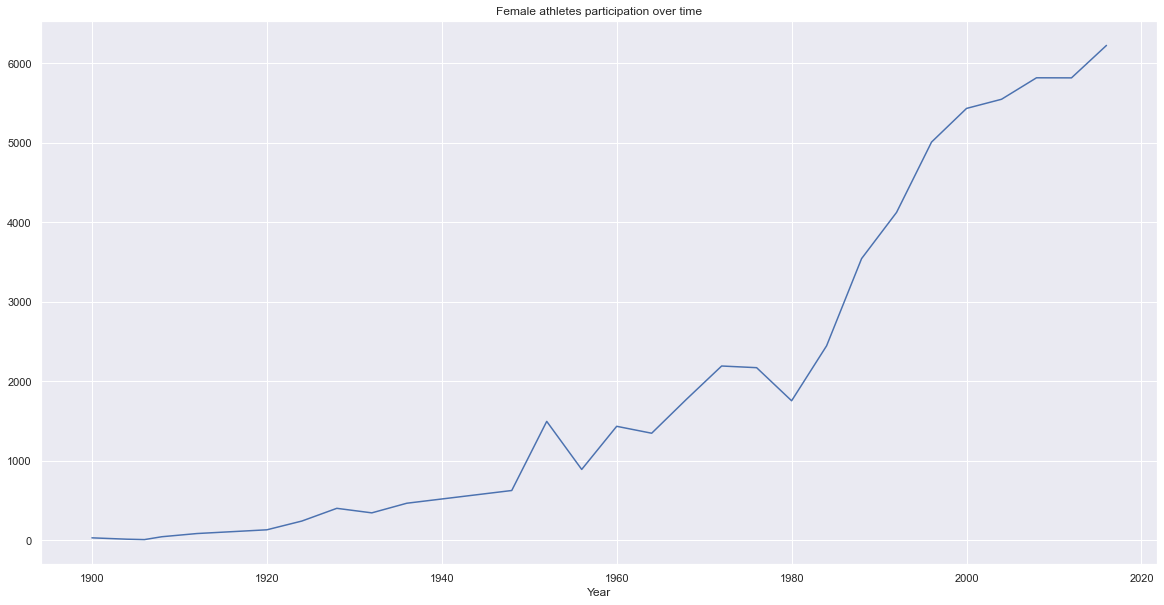

In [121]:
women = women.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10))
women.loc[:,'F'].plot()
plt.title('Female athletes participation over time');


In [125]:
#GOLD MEDALISTS ABOVE AGE 60
goldmedals = olympics_df[(olympics_df.Medal == 'Gold')]
event = goldmedals['Sport'][goldmedals['Age']>60]
event

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

In [126]:
#GOLD MEDALS FROM EACH COUNTRY
goldmedals.Region.value_counts().reset_index(name='Medal')

,index,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,678
4,Italy,575
...,...,...
94,Costa Rica,1
95,Kosovo,1
96,Nepal,1
97,Israel,1


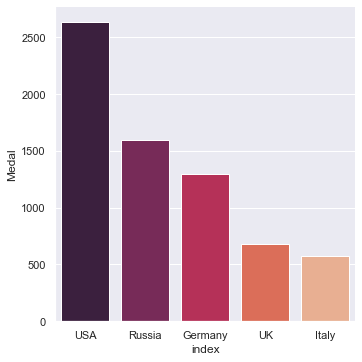

In [131]:
totalgoldmedals = goldmedals.Region.value_counts().reset_index(name='Medal').head(5)
gold = sns.catplot(x='index',y='Medal',data=totalgoldmedals,height=5,kind='bar',palette="rocket")

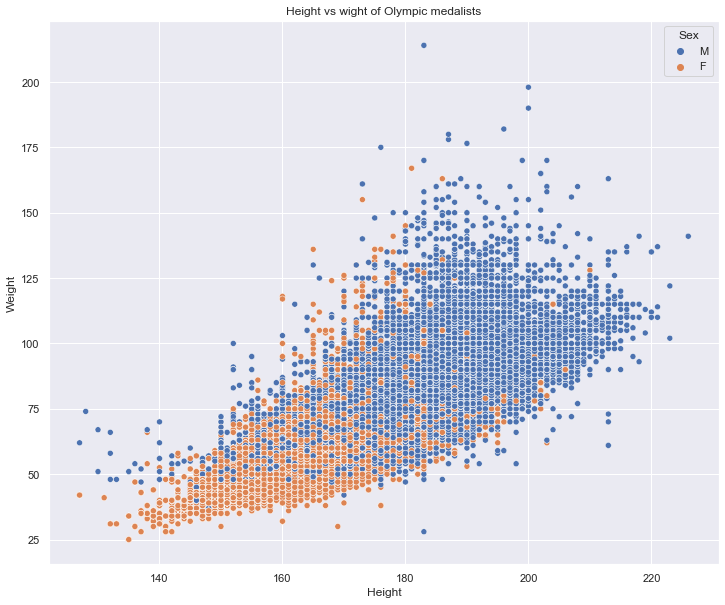

In [135]:
not_null_medals = olympics_df[(olympics_df['Height'].notnull()) & (olympics_df['Weight'].notnull())]
plt.figure(figsize=(12,10))
axis=sns.scatterplot(x='Height',y='Weight', data = not_null_medals, hue ='Sex')
plt.title('Height vs wight of Olympic medalists');